### 3주차 수업

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier   # Xgboost 모델
from lightgbm import LGBMClassifier   # LightGBM 모델


from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

#### Bagging

In [2]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [3]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()    # 데이터를 넘파이 형태로 변환
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)   # 훈련/테스트 데이터 나누기

In [4]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
# 교차검증으로 성능 확인

print(np.mean(scores['test_score']))

0.8905151032797809


In [5]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [6]:
# oob_score = True로 하여 훈련, oob 샘플을 기반으로 평가
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


In [7]:
# 엑스트라 트리 : 랜덤포레스트보다 무작위성이 있는 앙상블 모델
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['test_score']))

0.8887848893166506


In [8]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


#### Boosting

In [9]:
# Gradient Boosting은 학습률, 손실함수 등의 매개변수가 있음
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['test_score']))

0.8780082549788999


In [10]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


In [11]:
# 히스토그램 기반으로 그레이디언트 부스팅 수행
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['test_score']))

0.8801241948619236


In [12]:
# 변수 중요도 : 각 변수를 재배열한 후 예측력이 얼마나 변하는지
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [13]:
hgb.score(test_input, test_target)

0.8723076923076923

In [14]:
# GradientBoosting 보완 -> Xgboost 모델
xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['test_score']))

0.8782000074035686


In [15]:
# 실행속도가 느린 Xgboost 보완 -> LightGBM 모델
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884


#### Clustering

In [16]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy # 과일 데이터 다운

--2023-12-19 16:43:33--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-12-19 16:43:33--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-12-19 16:43:33--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

In [17]:
fruits = np.load('fruits_300.npy')

In [18]:
print(fruits.shape)

(300, 100, 100)


In [19]:
# (데이터 개수, 100, 100) 형태의 2차원 이미지 데이터 -> 일렬의 벡터로 펼쳐준다
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [20]:
print(apple.shape)

(100, 10000)


In [21]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


In [22]:
# 3가지 과일의 펼친 벡터값들의 평균(mean) -> 평균값들의 벡터를 다시 2차원 이미지 데이터로(reshape)
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

In [23]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
# apple_mean과 과일 데이터 집합 간의 오차를 절댓값으로 계산한 평균
print(abs_mean.shape)

(300,)


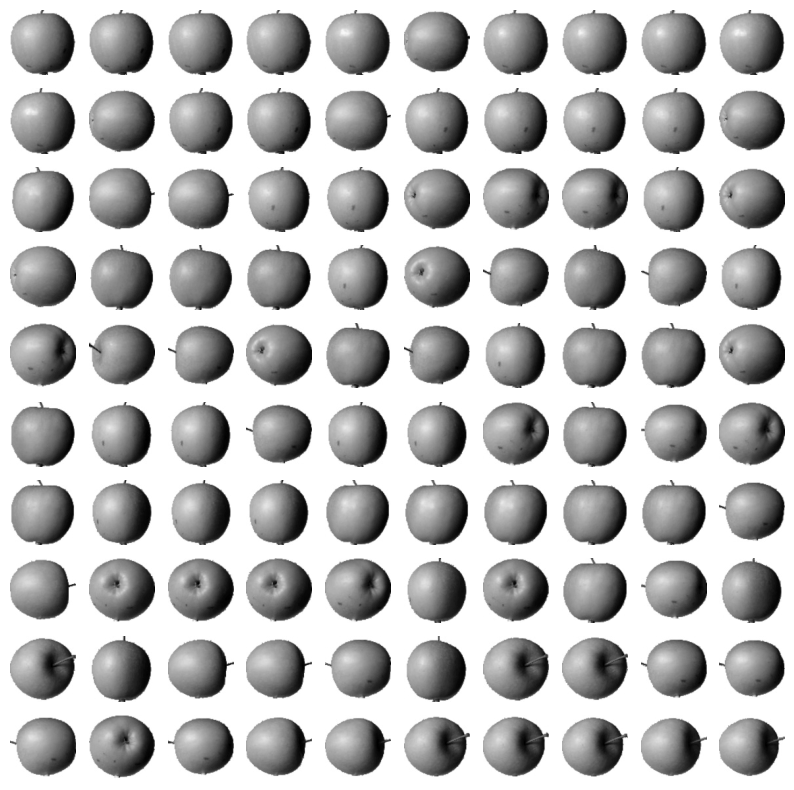

In [24]:
# 가장 적은 오차를 갖는 100개의 데이터를 서브플롯을 이용해 한번에 출력
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

#### K-means

In [25]:
fruits_2d = fruits.reshape(-1, 100*100)

In [26]:
km = KMeans(n_clusters=3, random_state=42)    # k값을 3으로 지정

km.fit(fruits_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [27]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [28]:
print(km.transform(fruits_2d[100:101]))

[[3393.8136117  8837.37750892 5267.70439881]]


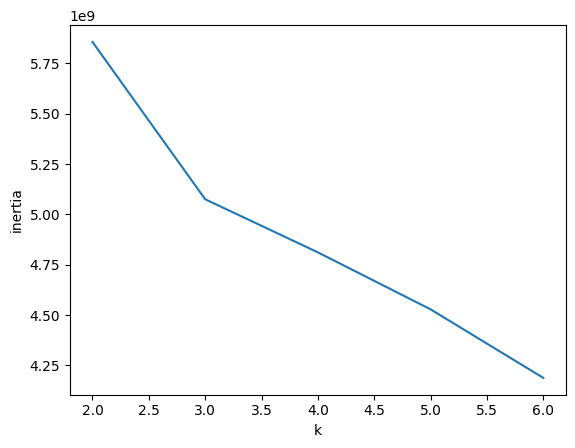

In [29]:
# elbow(엘보우 기법)
# 결과 : 과일 종류가 3개이므로 k값이 3에서 꺾인다.

inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

#### 차원 축소

In [30]:
pca = PCA(n_components=50)

pca.fit(fruits_2d)

PCA(n_components=50)

In [31]:
print(pca.components_.shape)

(50, 10000)


In [32]:
print(fruits_2d.shape)

(300, 10000)


In [33]:
fruits_pca = pca.transform(fruits_2d)   # 차원 축소

In [34]:
print(fruits_pca.shape)
# 차원 개수 : 10000개 -> 50개

(300, 50)


In [35]:
fruits_inverse = pca.inverse_transform(fruits_pca)    # inverse_transform : 다시 차원 축소를 한 데이터 복구

print(fruits_inverse.shape)

(300, 10000)


In [36]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

In [37]:
print(np.sum(pca.explained_variance_ratio_))    # 설명된 분산 출력

0.9215687639813682


In [38]:
lr = LogisticRegression()

target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [39]:
scores = cross_validate(lr, fruits_2d, target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
# 로지스틱 회귀 모델에 비해 수행시간이 비약적으로 줄어들었음

0.9966666666666667
1.9005565643310547


In [40]:
scores = cross_validate(lr, fruits_pca, target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.03633394241333008


In [41]:
km = KMeans(n_clusters=3, random_state=42)

km.fit(fruits_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

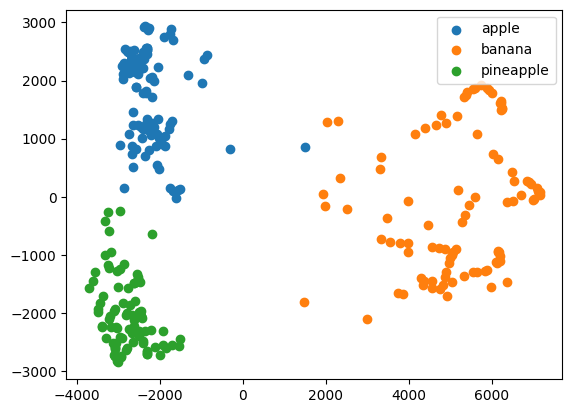

In [42]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

#### 과제

In [43]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy!

--2023-12-19 16:43:51--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-12-19 16:43:51--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-12-19 16:43:51--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [44]:
fruits = np.load('fruits_300.npy')

In [45]:
fruits_2d = fruits.reshape(-1, 100*100)

In [46]:
pca = PCA(n_components=50)

In [47]:
pca.fit(fruits_2d)

PCA(n_components=50)

In [48]:
fruits_pca = pca.transform(fruits_2d)   # 데이터 차원 축소

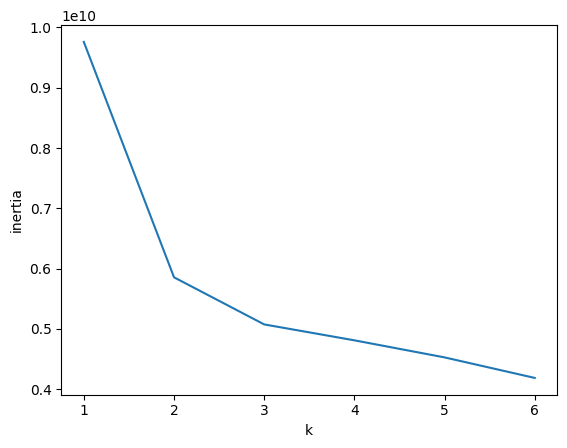

In [49]:
inertia = []
for k in range(1, 7):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(1, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 2와 3에서 꺾임. 적절한 값은 3

In [50]:
km = KMeans(n_clusters=3, random_state=42)

In [51]:
km.fit(fruits_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [52]:
from sklearn.cluster import DBSCAN

ds=DBSCAN(eps=7.0, min_samples=30)
ds.fit(fruits_pca)

DBSCAN(eps=7.0, min_samples=30)

### 추가수업 : NLP 기초

In [53]:
!pip install tensorflow

In [54]:
import numpy
import tensorflow as tf
from numpy import array

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding

from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [55]:
text = '아 집가고 싶다.'

In [56]:
# text_to_word_sequence : 띄워쓰기 단위로 단어를 나눠줌
result = text_to_word_sequence(text)

print('원래 문구: ', text)
print('토큰화', result)

원래 문구:  아 집가고 싶다.
토큰화 ['아', '집가고', '싶다']


In [57]:
docs = ['먼저 텍스트와 각 단어를 나누어 토큰화 합니다',
        '텍스트의 단어로 토큰화 해야 딥러닝에서 인식됩니다.',
        '토큰화 한 결과는 딥러닝에서 사용할 수 있습니다.',
        ]

In [58]:
token = Tokenizer()
token.fit_on_texts(docs)

In [59]:
print('단어 카운트', token.word_counts)

단어 카운트 OrderedDict([('먼저', 1), ('텍스트와', 1), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 3), ('합니다', 1), ('텍스트의', 1), ('단어로', 1), ('해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('한', 1), ('결과는', 1), ('사용할', 1), ('수', 1), ('있습니다', 1)])


In [60]:
print('문장 카운트: ', token.document_count)                      # 토큰 개수
print('각 단어가 몇개의 문장에 포함되는가: ', token.word_docs)    # 단어가 몇개 있는지
print('각 단어에 매겨진 인덱스 값: ', token.word_index)           # 단어 인덱스

문장 카운트:  3
각 단어가 몇개의 문장에 포함되는가:  defaultdict(<class 'int'>, {'먼저': 1, '텍스트와': 1, '토큰화': 3, '각': 1, '단어를': 1, '나누어': 1, '합니다': 1, '인식됩니다': 1, '단어로': 1, '딥러닝에서': 2, '텍스트의': 1, '해야': 1, '사용할': 1, '한': 1, '수': 1, '있습니다': 1, '결과는': 1})
각 단어에 매겨진 인덱스 값:  {'토큰화': 1, '딥러닝에서': 2, '먼저': 3, '텍스트와': 4, '각': 5, '단어를': 6, '나누어': 7, '합니다': 8, '텍스트의': 9, '단어로': 10, '해야': 11, '인식됩니다': 12, '한': 13, '결과는': 14, '사용할': 15, '수': 16, '있습니다': 17}


In [61]:
docs = ['너무 재밌어요', '최고에요', '참 잘 만든 영화네요', '추천하고 싶은 영화 입니다.', '한번 더 보고싶네요',
        '글쎄요', '별로에요', '생각보다 지루하네요', '연기가 어색해요', '재미없어요']

In [62]:
classes = array([1,1,1,1,1,0,0,0,0,0])    # 단어 라벨링

In [63]:
token = Tokenizer()

In [64]:
token.fit_on_texts(docs)

print(token.word_index)

{'너무': 1, '재밌어요': 2, '최고에요': 3, '참': 4, '잘': 5, '만든': 6, '영화네요': 7, '추천하고': 8, '싶은': 9, '영화': 10, '입니다': 11, '한번': 12, '더': 13, '보고싶네요': 14, '글쎄요': 15, '별로에요': 16, '생각보다': 17, '지루하네요': 18, '연기가': 19, '어색해요': 20, '재미없어요': 21}


In [65]:
x = token.texts_to_sequences(docs)      # 단어 임베딩

print('문장 숫자화: ', x)

문장 숫자화:  [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14], [15], [16], [17, 18], [19, 20], [21]]


In [66]:
padded_x = pad_sequences(x, 10)         # 패딩(데이터가 빈 곳은 0으로 채움)

print('패딩 결과:\n', padded_x)

패딩 결과:
 [[ 0  0  0  0  0  0  0  0  1  2]
 [ 0  0  0  0  0  0  0  0  0  3]
 [ 0  0  0  0  0  0  4  5  6  7]
 [ 0  0  0  0  0  0  8  9 10 11]
 [ 0  0  0  0  0  0  0 12 13 14]
 [ 0  0  0  0  0  0  0  0  0 15]
 [ 0  0  0  0  0  0  0  0  0 16]
 [ 0  0  0  0  0  0  0  0 17 18]
 [ 0  0  0  0  0  0  0  0 19 20]
 [ 0  0  0  0  0  0  0  0  0 21]]


In [67]:
word_size = len(token.word_index) + 1     # 단어 수 측정

In [68]:
# 딥러닝 계층 설계하는 과정

model = Sequential()

model.add(Embedding(word_size, 8, input_length = 10))     # 모델에 하나씩 끼워보는 것
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.fit(padded_x, classes, epochs = 20)   # 반복횟수 지정


print('accuracy: %.4f' % (model.evaluate(padded_x, classes)[1]))

Epoch 1/20
1/1 [==============================] - 1s 876ms/step - loss: 0.6892 - accuracy: 0.6000
Epoch 2/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6878 - accuracy: 0.7000
Epoch 3/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6863 - accuracy: 0.7000
Epoch 4/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6849 - accuracy: 0.7000
Epoch 5/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6835 - accuracy: 0.7000
Epoch 6/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6820 - accuracy: 0.8000
Epoch 7/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6806 - accuracy: 0.9000
Epoch 8/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6791 - accuracy: 0.9000
Epoch 9/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6777 - accuracy: 0.9000
Epoch 10/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6762 - accuracy: 0.9000
Epoch 11/20
1/1 [===========